---
---

<h1 align='center'> Anamoly Detection </h1>
<h2 align='center'> Transfer-Learning Models</h2> 


1.   ML[Smote(Bert features extracted from pretrained model)]
2.   Bert+NN full trainable

---
---

In [4]:
pip install tensorflow

     ------------------------------------ 455.9/455.9 MB 545.2 kB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
     ---------------------------------------- 1.5/1.5 MB 993.3 kB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ---------------------------------------- 3.7/3.7 MB 810.2 kB/s eta 0:00:00
     ------------------------------------ 895.9/895.9 kB 708.5 kB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 14.2/14.2 MB 599.7 kB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 532.2 kB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     -----

In [4]:
#Import Libraries and upload clean data into workspace
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from tensorflow import keras
import tensorflow as tf
# tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)

import warnings
warnings.filterwarnings('ignore')

## Read File

In [1]:
import pandas as pd
data = pd.read_csv("cleaned_data_100.csv")
data = data.sample(n = 10000)
#expanding the dispay of text sms column
pd.set_option('display.max_colwidth', -1)

C:\Users\sriva\AppData\Local\Temp\ipykernel_4712\35493751.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
# from google.colab import data_table
# data_table.enable_dataframe_formatter()
# #Print the dataframe
data

,X_data,Y_data
12750,81109 203727 200 INFO dfs DataNode PacketResponder Received block blk5965876303758897519 of size 67108864 from 10 251 90 64 E9 Received block of size from,0
23620,81109 203851 246 INFO dfs DataNode PacketResponder PacketResponder 1 for block blk3899481423628647570 terminating E11 PacketResponder for block terminating,0
37076,81109 204038 32 INFO dfs FSNamesystem BLOCK NameSystem addStoredBlock blockMap updated 10 251 126 83 50010 is added to blk8827951563980824329 size 67108864 E26 BLOCK NameSystem addStoredBlock blockMap updated is added to size,1
13411,81109 203731 224 INFO dfs DataNode DataXceiver Receiving block blk9036962293154594303 src 10 251 42 246 42470 dest 10 251 42 246 50010 E5 Receiving block src dest,1
38106,81109 204047 29 INFO dfs FSNamesystem BLOCK NameSystem addStoredBlock blockMap updated 10 251 111 209 50010 is added to blk2190210906526916834 size 67108864 E26 BLOCK NameSystem addStoredBlock blockMap updated is added to size,0
...,...,...
14216,81109 203737 27 INFO dfs FSNamesystem BLOCK NameSystem allocateBlock user root rand temporary task2008110920300001m0003180 part00318 blk3996614464467767161 E22 BLOCK NameSystem allocateBlock,0
100363,81109 204840 639 INFO dfs DataNode PacketResponder Received block blk7686356201822676456 of size 67108864 from 10 251 194 147 E9 Received block of size from,0
95135,81109 204759 31 INFO dfs FSNamesystem BLOCK NameSystem addStoredBlock blockMap updated 10 251 106 50 50010 is added to blk3001641809063596027 size 67108864 E26 BLOCK NameSystem addStoredBlock blockMap updated is added to size,0
69612,81109 204502 33 INFO dfs FSNamesystem BLOCK NameSystem addStoredBlock blockMap updated 10 251 70 211 50010 is added to blk6317772835218046259 size 67108864 E26 BLOCK NameSystem addStoredBlock blockMap updated is added to size,0


## Exploratory Data Analysis

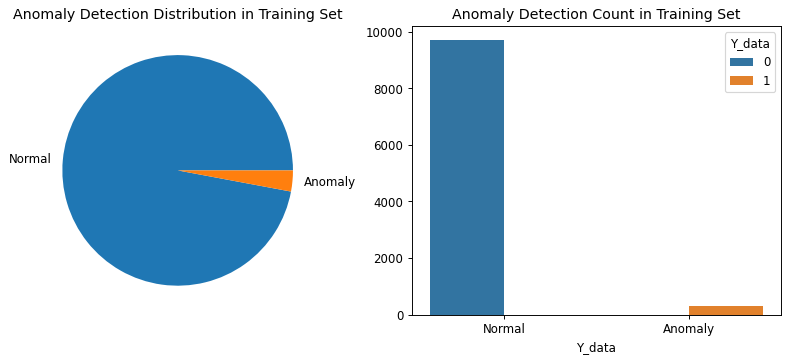

In [5]:
import seaborn as sns

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), dpi=85)
plt.tight_layout()

data.groupby('Y_data').count()['X_data'].plot(kind='pie', ax=axes[0], labels=['Normal', 'Anomaly'])
sns.countplot(x=data['Y_data'], hue=data['Y_data'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Normal', 'Anomaly'])
axes[0].tick_params(axis='x', labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)
axes[1].tick_params(axis='x', labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

axes[0].set_title('Anomaly Detection Distribution in Training Set', fontsize=12)
axes[1].set_title('Anomaly Detection Count in Training Set', fontsize=12)

plt.show()

In [6]:
data.groupby('Y_data').count()['X_data']

Y_data
0    9706
1    294 
Name: X_data, dtype: int64

## Specs and Dependencies

In [10]:
!pip3 install tensorflow_text
!pip3 install tensorflow_hub
!pip3 install tensorflow-gpu

     ---------------------------------------- 5.0/5.0 MB 743.0 kB/s eta 0:00:00
  Using cached tensorflow_hub-0.12.0-py2.py3-none-any.whl (108 kB)
^C


In [7]:
#cpu
split_bar = '='*20
print(f"{split_bar} CPU {split_bar}")
cpu_info = !lscpu
for inf_item in cpu_info.get_list():
  print(inf_item)

==================== CPU ====================
'lscpu' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
print(f"{split_bar} RAM {split_bar}")
!free -h #ram
print(f"{split_bar} CUDA {split_bar}")
!nvcc --version #cuda

==================== RAM ====================
==================== CUDA ====================


'free' is not recognized as an internal or external command,
operable program or batch file.
'nvcc' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
!nvidia-smi


Num GPUs Available:  0
Tue Nov  1 10:11:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.72       Driver Version: 512.72       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   69C    P0    12W /  N/A |     44MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                

## **Bert Models** (*Hugging Face*)

In [10]:

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/4',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/2',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

print('Available Pretrained Models:',*list(map_name_to_handle.keys()), sep = "\n")

Available Pretrained Models:
bert_en_uncased_L-12_H-768_A-12
bert_en_cased_L-12_H-768_A-12
bert_multi_cased_L-12_H-768_A-12
small_bert/bert_en_uncased_L-2_H-128_A-2
small_bert/bert_en_uncased_L-2_H-256_A-4
small_bert/bert_en_uncased_L-2_H-512_A-8
small_bert/bert_en_uncased_L-2_H-768_A-12
small_bert/bert_en_uncased_L-4_H-128_A-2
small_bert/bert_en_uncased_L-4_H-256_A-4
small_bert/bert_en_uncased_L-4_H-512_A-8
small_bert/bert_en_uncased_L-4_H-768_A-12
small_bert/bert_en_uncased_L-6_H-128_A-2
small_bert/bert_en_uncased_L-6_H-256_A-4
small_bert/bert_en_uncased_L-6_H-512_A-8
small_bert/bert_en_uncased_L-6_H-768_A-12
small_bert/bert_en_uncased_L-8_H-128_A-2
small_bert/bert_en_uncased_L-8_H-256_A-4
small_bert/bert_en_uncased_L-8_H-512_A-8
small_bert/bert_en_uncased_L-8_H-768_A-12
small_bert/bert_en_uncased_L-10_H-128_A-2
small_bert/bert_en_uncased_L-10_H-256_A-4
small_bert/bert_en_uncased_L-10_H-512_A-8
small_bert/bert_en_uncased_L-10_H-768_A-12
small_bert/bert_en_uncased_L-12_H-128_A-2
small

In [11]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

# Choose the Model
bert_model_name = 'small_bert/bert_en_uncased_L-12_H-768_A-12' 

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

# tf.compat.v1.disable_eager_execution()
bert_preprocess = hub.KerasLayer(tfhub_handle_preprocess, name='preprocess', trainable=False)
bert_encoder = hub.KerasLayer(tfhub_handle_encoder, name='encoder', trainable=False)

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/2
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


## Feature Extraction

In [ ]:
from tqdm import tqdm
import csv
import psutil

#features = []
with open("output.csv",'w') as f:
  writer = csv.writer(f, delimiter=',', lineterminator='\n')
  writer.writerow(list(range(768)))
  
  for i in tqdm(data['X_data']):
    # clear tensorflow ram when it exceeds 90 percent of ram usage
    if psutil.virtual_memory().percent > 90:
      tf.keras.backend.clear_session()
    
    bert_results = bert_encoder(bert_preprocess([i]))
    bert_out = bert_results["pooled_output"].numpy()[0]
    #print(bert_out.shape)
    #features.append(bert_out)
    writer.writerow(bert_out)
  #features = np.array(features)

 41%|████      | 4073/10000 [4:28:39<6:30:56,  3.96s/it] 


In [ ]:
#Saving features
#features = features.reshape(len(data),768)
#np.save('bert-features',features)
features = pd.read_csv("output.csv") 
features.shape

---
# **Transfer Learning Approches**
*restart the kernel for faster run-time as features are extracted from bert transformer and saved*

In [18]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

x = pd.read_csv("output.csv")
import pandas as pd
data = pd.read_csv("cleaned_data.csv")
y = data['Y_data'].apply(lambda x: -1 if x == 0 else 1)

## Solving Data Imbalance 

In [19]:
# import library
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', x.shape)
print('Resample dataset shape', x_smote.shape)
SmoteData = x_smote.copy()
SmoteData['Y_data'] = y_smote
SmoteData.groupby('Y_data').count()

Original dataset shape (2000, 768)
Resample dataset shape (3862, 768)


,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
Y_data,,,,,,,,,,,,,,,,,,,,,
-1,1931,1931,1931,1931,1931,1931,1931,1931,1931,1931,...,1931,1931,1931,1931,1931,1931,1931,1931,1931,1931
1,1931,1931,1931,1931,1931,1931,1931,1931,1931,1931,...,1931,1931,1931,1931,1931,1931,1931,1931,1931,1931


In [20]:
SmoteData.groupby('Y_data').count()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
Y_data,,,,,,,,,,,,,,,,,,,,,
-1,1931,1931,1931,1931,1931,1931,1931,1931,1931,1931,...,1931,1931,1931,1931,1931,1931,1931,1931,1931,1931
1,1931,1931,1931,1931,1931,1931,1931,1931,1931,1931,...,1931,1931,1931,1931,1931,1931,1931,1931,1931,1931


---
### **1--> ML models with Hyper-parameter tuning**
---

## Train/Test/Validation Data-Split

In [14]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# split train dataset into train, validation and test sets
train_features, test_features, train_labels, test_labels = train_test_split(x_smote, y_smote,
                                                                            random_state=2022, 
                                                                            test_size=0.2)

class_names = ['Normal','Anomaly']

#### *Searching for the best model*
These above features-data is given as inputs for ML-Classifiers and best out them is found

In [37]:
from sklearn.svm import OneClassSVM
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, SGDOneClassSVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, IsolationForest
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

names = ["Lin OneClassSVM", "Poly OneClassSVM", "RBF OneClassSVM", 
         "Sig OneClassSVM", "Lin OneClassSVM - SGD", "LOF", "IsolationForest", 
         "Lin SVM", "Poly SVM", "RBF SVM", "Sig SVM", "lbfgs Log-Reg", 
         "saga Log-Reg", "SGD", "Naive Bayes", "Gaussian Process", "Decision Tree", 
         "Random Forest", "KNN", "GradientBoostingClassifier", "Neural Net", 
         "AdaBoost", "QDA", "LGBM", "XGB"]

classifiers = [OneClassSVM(kernel='linear',max_iter=10000), OneClassSVM(kernel='poly',max_iter=10000), 
               OneClassSVM(kernel='rbf',max_iter=10000), OneClassSVM(kernel='sigmoid',max_iter=10000),
               SGDOneClassSVM(max_iter=10000), LocalOutlierFactor(novelty=True), IsolationForest(),
               SVC(kernel='linear',max_iter=10000), SVC(kernel='poly',max_iter=10000), 
               SVC(kernel='rbf',max_iter=10000), SVC(kernel='sigmoid',max_iter=10000),
               LogisticRegression(solver='lbfgs'), LogisticRegression(solver='saga'), SGDClassifier(), 
               GaussianNB(), GaussianProcessClassifier(), DecisionTreeClassifier(max_depth=25), 
               RandomForestClassifier(max_depth=25), KNeighborsClassifier(), GradientBoostingClassifier(max_depth=5),
               MLPClassifier(max_iter=2500,early_stopping=True), AdaBoostClassifier(), 
               QuadraticDiscriminantAnalysis(), LGBMClassifier(), XGBClassifier()]

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time

def runML():
    for i in range(len(class_names)):
        if (i == 0):
            ii = -1
        else:
            ii = 1
        print("CLASS - (",ii,") -->",class_names[i])

    fig = plt.figure(figsize=(18,20))
    fig.tight_layout()
    nof_clsfrs = len(names)
    Metrics = {}
    
    print('\nClassification Report for each Classifier:')
    for i in range(nof_clsfrs):
        metric = []
        classifier = classifiers[i]
        plt.subplot(nof_clsfrs/5,5,i+1)
        plt.xticks([])
        plt.yticks([])
    
        print(f'\n\nClassifier: {str(classifier)[:30]}...')
        start_time = time.time(); classifier.fit(train_features, train_labels); metric.append(time.time() - start_time); 
        start_time = time.time(); test_pred = classifier.predict(test_features); metric.append(time.time() - start_time);
        acc = accuracy_score(test_labels,test_pred) *100; metric.append(acc);
        Metrics[names[i]] = metric
        #print(f'Accuracy  is {acc}%, Report:')
        print(classification_report(test_labels, test_pred))
    
        plt.gca().set_title(names[i])
        CM = confusion_matrix(test_labels, test_pred)
        plt.imshow(CM,interpolation='nearest',cmap='summer')
        for (i, j), z in np.ndenumerate(CM):
            plt.text(j, i, z, ha='center', va='center')
        plt.xticks(np.arange(len(class_names)),class_names, fontsize=8)
        plt.yticks(np.arange(len(class_names)))
        plt.grid(False)
    plt.show()
    return Metrics

#### *Fitting and Ploting results*

CLASS - ( -1 ) --> Normal
CLASS - ( 1 ) --> Anomaly

Classification Report for each Classifier:


Classifier: OneClassSVM(kernel='linear', m...
              precision    recall  f1-score   support

          -1       0.50      0.51      0.50       377
           1       0.52      0.51      0.52       396

    accuracy                           0.51       773
   macro avg       0.51      0.51      0.51       773
weighted avg       0.51      0.51      0.51       773



Classifier: OneClassSVM(kernel='poly', max...
              precision    recall  f1-score   support

          -1       0.49      0.50      0.50       377
           1       0.52      0.51      0.51       396

    accuracy                           0.51       773
   macro avg       0.51      0.51      0.51       773
weighted avg       0.51      0.51      0.51       773



Classifier: OneClassSVM(max_iter=10000)...
              precision    recall  f1-score   support

          -1       0.54      0.59      0.57       377


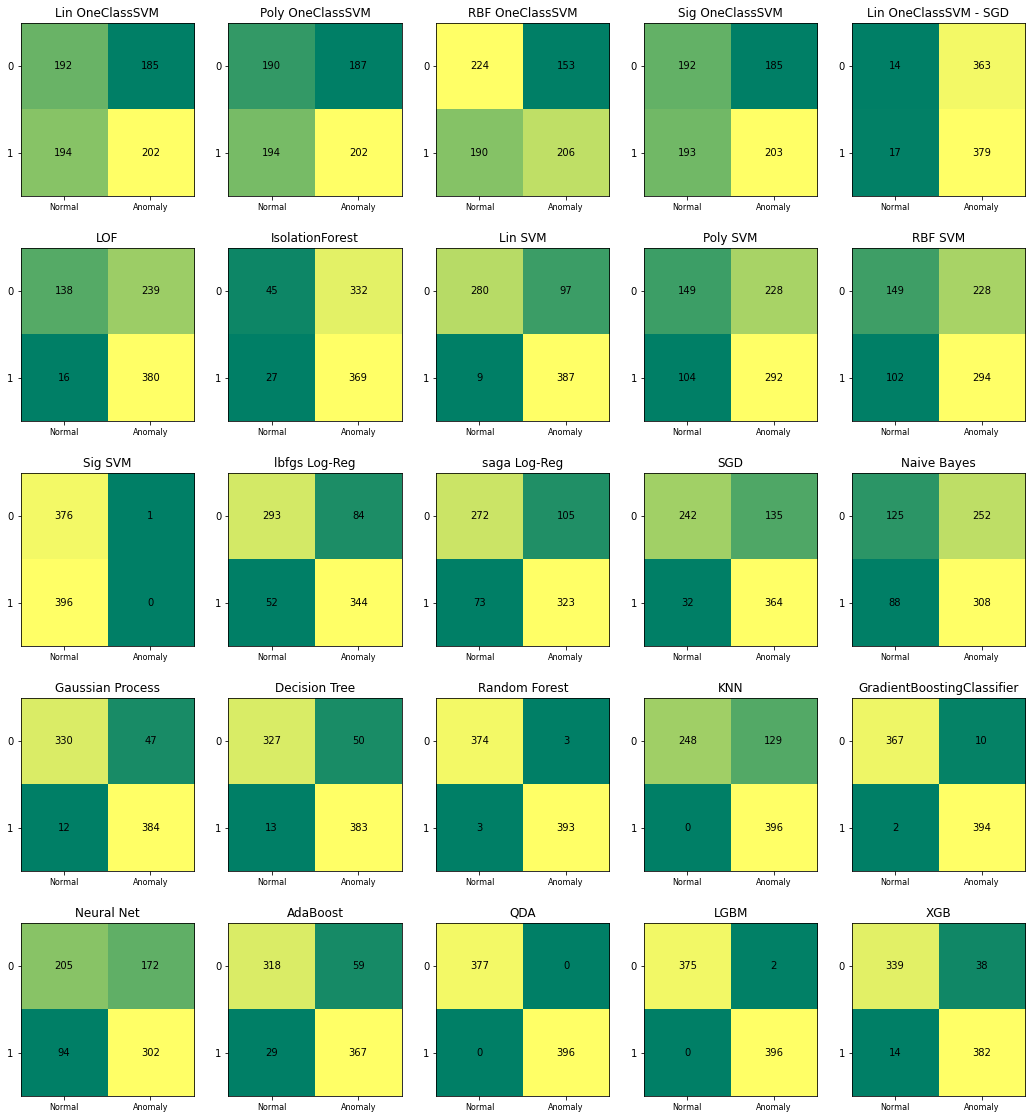

In [41]:
Metrics = runML()

In [42]:
result = pd.DataFrame(Metrics.values(), columns =['Training-time', 'Prediction-time', 'Accuracy'])
result.index = Metrics.keys()

print("\nClassifier for which max Accuracy is obtained:")
print(result.loc[result["Accuracy"].idxmax()])

print("\n\nClassifier for which min Training-time is obtained:")
print(result.loc[result["Training-time"].idxmin()])

print("\n\nClassifier for which min Prediction-time is obtained:")
print(result.loc[result["Prediction-time"].idxmin()])

print("\n\nResults of all the Classifiers:")
result.sort_values(by="Accuracy", ascending=False)


Classifier for which max Accuracy is obtained:
Training-time        0.990178
Prediction-time      0.067283
Accuracy           100.000000
Name: QDA, dtype: float64


Classifier for which min Training-time is obtained:
Training-time       0.008269
Prediction-time     0.182106
Accuracy           83.311772
Name: KNN, dtype: float64


Classifier for which min Prediction-time is obtained:
Training-time       0.034339
Prediction-time     0.005935
Accuracy           50.840880
Name: Lin OneClassSVM - SGD, dtype: float64


Results of all the Classifiers:


,Training-time,Prediction-time,Accuracy
QDA,0.990178,0.067283,100.000000
LGBM,13.374086,0.016873,99.741268
Random Forest,7.830748,0.027998,99.223803
GradientBoostingClassifier,110.791965,0.014699,98.447607
XGB,12.522847,0.017378,93.272962
Gaussian Process,15.278801,2.528587,92.367400
Decision Tree,3.349145,0.006808,91.849935
AdaBoost,14.930097,0.057314,88.615783
Lin SVM,1.900675,0.382161,86.287193
KNN,0.008269,0.182106,83.311772


---
### **2--> Bert + Dense layers only approach**
---

## Train/Test/Validation Data-Split

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# split train dataset into train, validation and test sets
train_text, test_text, train_labels, test_labels = train_test_split(data['X_data'], data['Y_data'],
                                                                            random_state=2022, 
                                                                            test_size=0.2, 
                                                                            stratify=data['Y_data'])

class_names = ['Normal','Anomaly']

In [ ]:
# change trainable parameter again
bert_preprocess = hub.KerasLayer(tfhub_handle_preprocess, name='preprocess', trainable=True)
bert_encoder = hub.KerasLayer(tfhub_handle_encoder, name='encoder', trainable=True)

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout1")(outputs['pooled_output'])
l = tf.keras.layers.Dense(2048, activation='relu', name="fc1")(l)
l = tf.keras.layers.Dense(2048, activation='relu', name="fc2")(l)
l = tf.keras.layers.Dropout(0.1, name="dropout2")(l)
l = tf.keras.layers.Dense(1024, activation='relu', name="fc3")(l)
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)
# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

ERROR:absl:hub.KerasLayer is trainable but has zero trainable weights.


Model: "small_bert/bert_en_uncased_L-12_H-768_A-12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocess (KerasLayer)        {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}             

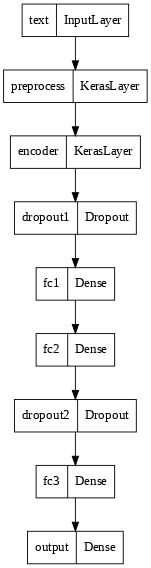

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model._name = bert_model_name
model.summary()
keras.utils.plot_model(model,dpi=65)

#### *Training and Results*

In [ ]:
#Stop training when a monitored metric (here, accuracy) has stopped improving.
#patience: Number of epochs with no improvement after which training will be stopped.
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5)

# Saving the best Trained model
model_file = model.name+'_Model.h5'
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(model_file, save_best_only=True)

tf.keras.backend.clear_session
history = model.fit(train_text, train_labels,
                    epochs=25,
                    validation_split=0.15,
                    callbacks=[early_stopping_cb, checkpoint_cb]
                   )

Epoch 1/25
43/43 [==============================] - 64s 1s/step - loss: 0.3939 - accuracy: 0.9250 - val_loss: 0.1344 - val_accuracy: 0.9708
Epoch 2/25
43/43 [==============================] - 41s 947ms/step - loss: 0.1665 - accuracy: 0.9647 - val_loss: 0.1786 - val_accuracy: 0.9708
Epoch 3/25
43/43 [==============================] - 47s 1s/step - loss: 0.1686 - accuracy: 0.9647 - val_loss: 0.1334 - val_accuracy: 0.9708
Epoch 4/25
43/43 [==============================] - 47s 1s/step - loss: 0.1711 - accuracy: 0.9647 - val_loss: 0.1321 - val_accuracy: 0.9708
Epoch 5/25
43/43 [==============================] - 40s 924ms/step - loss: 0.1631 - accuracy: 0.9647 - val_loss: 0.1481 - val_accuracy: 0.9708
Epoch 6/25
43/43 [==============================] - 40s 936ms/step - loss: 0.1583 - accuracy: 0.9647 - val_loss: 0.1322 - val_accuracy: 0.9708
Epoch 7/25
43/43 [==============================] - 40s 925ms/step - loss: 0.1602 - accuracy: 0.9647 - val_loss: 0.1384 - val_accuracy: 0.9708
Epoch 8/

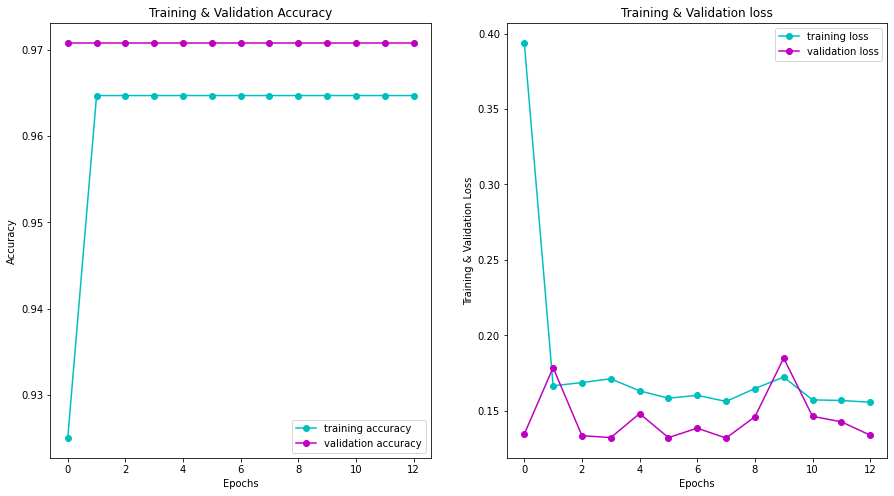

In [ ]:
def plot_accuracy_and_loss_of_train_and_validation_dataset(history):
    train_acc=history.history['accuracy']
    train_loss=history.history['loss']
    val_acc=history.history['val_accuracy']
    val_loss=history.history['val_loss']
    epoch=[i for i in range(len(train_acc))]
    fig , ax=plt.subplots(1,2)
    fig.set_size_inches(15,8)
    ax[0].plot(epoch,train_acc,'co-',label='training accuracy')
    ax[0].plot(epoch,val_acc,'mo-',label='validation accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
    ax[1].plot(epoch,train_loss,'c-o',label='training loss')
    ax[1].plot(epoch,val_loss,'m-o',label='validation loss')
    ax[1].set_title('Training & Validation loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Training & Validation Loss")

# incase of early stop
plot_accuracy_and_loss_of_train_and_validation_dataset(history)

#### **Evaluation**

In [ ]:
#model = keras.models.load_model(model_file) # rollback to best model
loss,accuracy = model.evaluate(data['X_data'], data['Y_data'])
print("The accuracy of train text is : ",accuracy)

63/63 [==============================] - 21s 337ms/step - loss: 0.1506 - accuracy: 0.9655
The accuracy of train text is :  0.965499997138977


#### *Accuracy for each class*

In [ ]:
print("Predicting Test data using the above Trained model...")
pred_Ids_of_test = model.predict(test_text)

Predicting Test data using the above Trained model...
13/13 [==============================] - 5s 361ms/step


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
predIdxs = np.argmax(pred_Ids_of_test, axis=1) # to get the indices of max value in each row
print(classification_report(test_labels, predIdxs,target_names=class_names))

              precision    recall  f1-score   support

      Normal       0.96      1.00      0.98       386
     Anomaly       0.00      0.00      0.00        14

    accuracy                           0.96       400
   macro avg       0.48      0.50      0.49       400
weighted avg       0.93      0.96      0.95       400



#### **Confusion Matrix**

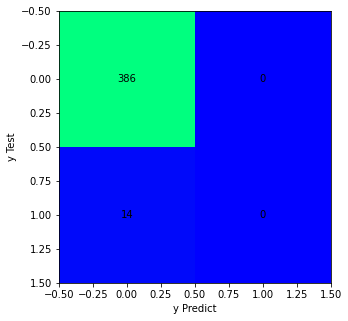

In [ ]:
CM = confusion_matrix(test_labels, predIdxs)
# Plot confusion matrix
plt.figure(figsize = (5,5))
plt.imshow(CM,interpolation='nearest',cmap='winter')
for (i, j), z in np.ndenumerate(CM):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("y Predict")
plt.ylabel("y Test")
plt.grid(False)
plt.show()

---